170498071/170498071 [==============================] - 985s 6us/step
0
1/1 [==============================] - 1s 701ms/step


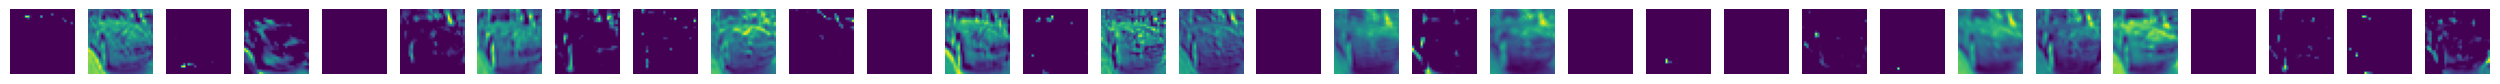

1
1/1 [==============================] - 0s 64ms/step


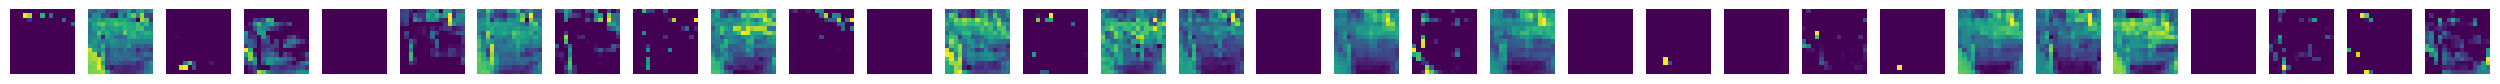

2
1/1 [==============================] - 0s 60ms/step


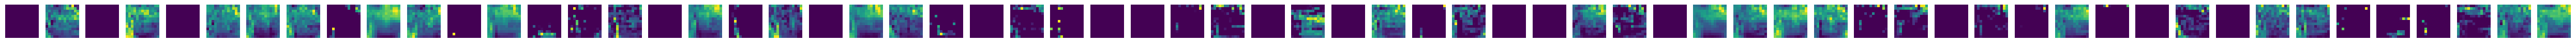

In [1]:
import numpy as np
from keras.models import Model
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Define model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Get layer outputs
layer_outputs = [layer.output for layer in model.layers[:3]]
# Extracts the outputs of the top 3 layers
activation_model = Model(inputs=model.input, outputs=layer_outputs)
 # Creates a model that will return these outputs, given the model input

# Visualize feature maps
def visualize_feature_maps(layer_index, image_index):
    activations = activation_model.predict(x_train[image_index].reshape(1, 32, 32, 3))
    activation = activations[layer_index]
    feature_map_count = activation.shape[-1]
    plt.figure(figsize=(feature_map_count, 1))
    for i in range(feature_map_count):
        plt.subplot(1, feature_map_count, i+1)
        plt.imshow(activation[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.show()


for layer in range(3):
   print(layer)
   visualize_feature_maps(layer,5)


# Example: Visualize feature maps for the first convolutional layer of the first image

